In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline

In [2]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf');

font = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/Avenir.ttf')

In [3]:
plt.rcParams.update({'text.usetex': True,
                        'font.family': "sans-serif",
                        'text.latex.preamble': r"\usepackage{amsmath}"})

In [4]:
# reading processed SNPs data:

what = 'syn'
species = 'MGYG-HGUT-02492'

# lambda_2 as a function of coordinate distance ell
ell_scan = {} # [x, y]
for i in range(6):
    ell_scan[i] = []
    ell_scan[i].append(np.load('../uhgg/' + what + '/' + species + '/ell_scan_ells_' + str(i) + '.npy'))
    ell_scan[i].append(np.load('../uhgg/' + what + '/' + species + '/ell_scan_stats_' + str(i) + '.npy'))

# lambda_2 as a function of allele frequency scale f0
f0_scan = {} # [x, y]
for i in range(3):
    f0_scan[i] = []
    f0_scan[i].append(np.load('../uhgg/' + what + '/' + species + '/f_scan_f0s_' + str(i) + '.npy'))
    f0_scan[i].append(np.load('../uhgg/' + what + '/' + species + '/f_scan_stats_' + str(i) + '.npy'))

# loading pre-processed data; see ./fig9C_preprocess_data.ipynb
nrf2_large_f0 = np.load('../uhgg/' + what + '/' + species + '/LEs_uhgg_big-freq.npy')
nrf2_med_f0 = np.load('../uhgg/' + what + '/' + species + '/LEs_uhgg_med-freq.npy')

# loading pre-processed data; see ./fig9D_preprocess_data.ipynb
four_gamete_f0s = np.load('../uhgg/' + what + '/' + species + '/f0s_fig9d.npy')
four_gamete_prob = np.load('../uhgg/' + what + '/' + species + '/LE_prob_fig9d.npy')

In [5]:
# defining theory curves for panel d (see main text)
def four_gamete_theory(fs, NR, n):
    alpha = 2 * NR * fs**2
    beta = 2 * NR
    probs = 1 - np.power(beta / (beta + n), alpha)
    return probs

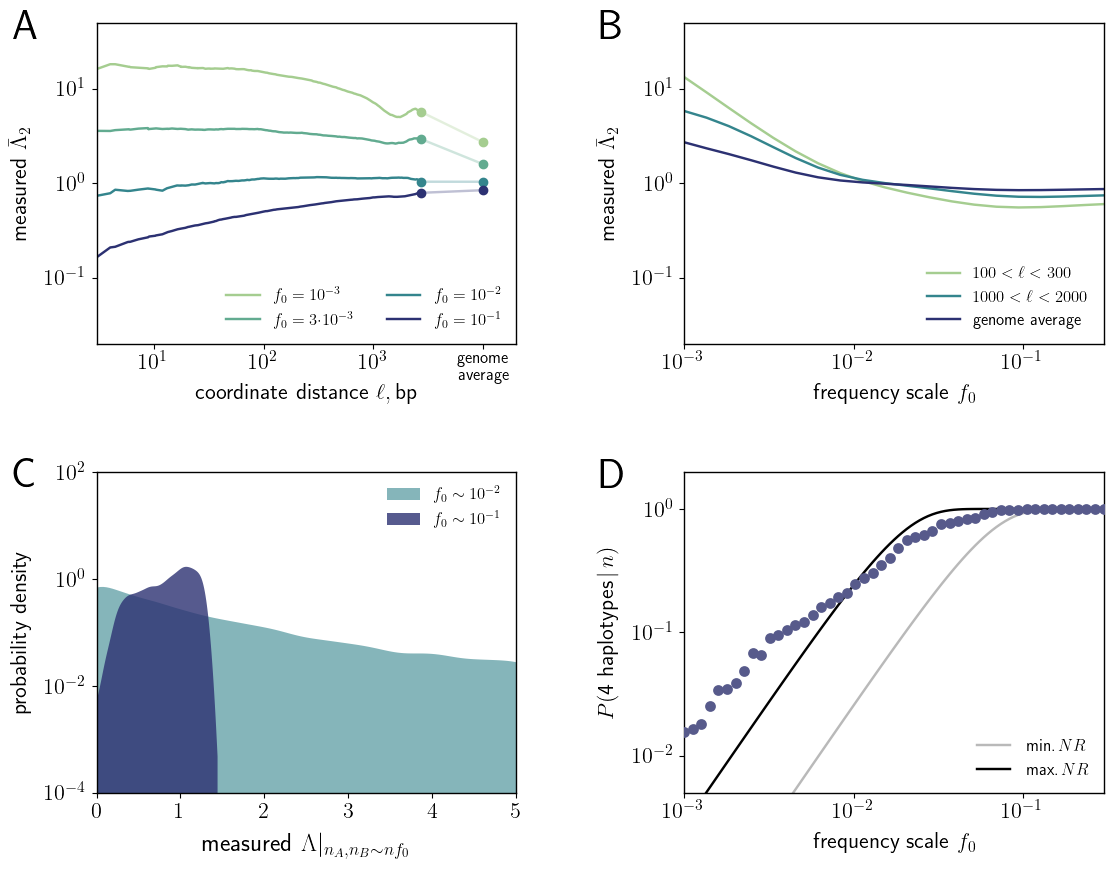

In [6]:
matplotlib.rcParams['axes.linewidth'] = 1

fig = plt.figure(figsize=(13, 10))

grid = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[1, 1], wspace=0.4,
                         height_ratios=[1, 1], hspace=0.4)

grey = '#b9b9b9' # note that this is different from before!
dark_grey = '#696969'
w = 1.75 # linewidth -- increased since this is a smalle figure

for c in range(4):
    
    plt.subplot(grid[c // 2, c % 2])
    
    # left panel: lambda_2 as a function of ell
    if c == 0: 
        
        ax = plt.gca()
        plt.text(-0.2, 0.95, 'A', fontsize=30, fontweight='black', transform=ax.transAxes)
        
        cmap = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=1, vmax=5),cmap=sns.color_palette("crest_r", as_cmap=True))
        labels = {0: '$f_0=10^{0}$', 1: '$f_0=10^{-1}$', 2: '$f_0=3 {\cdot} 10^{-2}$', 3: '$f_0=10^{-2}$', 4: '$f_0=3 {\cdot} 10^{-3}$', 5: '$f_0=10^{-3}$'} 
        
        for i in reversed(range(6)):
            
            if i in [0, 2]:
                continue
            else:
                color=matplotlib.colors.rgb2hex(cmap.to_rgba(i))
                z=1
            
            plt.loglog(ell_scan[i][0][:-1], ell_scan[i][1][:-1], color=color, linewidth=w, label=labels[i], zorder=z)
            plt.loglog([ell_scan[i][0][-2], 1e4], ell_scan[i][1][-2:], color=color, alpha=0.3, linewidth=w, zorder=z)
            
            plt.scatter(ell_scan[i][0][-2], ell_scan[i][1][-2], color=color)
            plt.scatter(1e4, ell_scan[i][1][-1], color=color)
            
        plt.xticks([1e1, 1e2, 1e3, 1e4], 
                   ['$10^{1}$', '$10^{2}$', '$10^{3}$', ''])
        plt.yticks([1e-1, 1e0, 1e1], 
                   ['$10^{-1}$', '$10^{0}$', '$10^{1}$'])
        plt.ylim([2e-2, 5e1])
        plt.xlim([3, 2e4])
        
        # adding the genome average tick label to the x-axis in a smaller font
        plt.text(1e4, 0.8e-2, r"$\text{genome}$" + '\n' + r"$\text{average}$", fontsize=12, ha='center')

        plt.minorticks_off()
        # changing font size since this is a smaller figure
        plt.tick_params(axis='both', labelsize=16)
        
        # changing font size since this is a smaller figure
        plt.ylabel(r"$\text{measured}\,\,\bar{\Lambda}_2$", fontsize=16, labelpad=10)
        plt.xlabel(r"$\text{coordinate distance}\,\,\ell, \text{bp}$", fontsize=16, labelpad=8)   
        
        
        #(lines, labels) = plt.gca().get_legend_handles_labels()
        #lines.insert(2, plt.Line2D(range(10), range(10), linestyle='none', marker='none'))
        #labels.insert(2,'')
        
        plt.legend(frameon=False, fontsize=12, loc='lower right', labelspacing=0.5, ncol=2);
    
    elif c == 1:
        
        ax = plt.gca()
        plt.text(-0.2, 0.95, 'B', fontsize=30, fontweight='black', transform=ax.transAxes)
        
        cmap = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=2),cmap=sns.color_palette("crest_r", as_cmap=True))
        labels = {0: r"$\text{genome average}$", 1: r"$1000 < \ell < 2000$", 2: r"$100 < \ell < 300$"} 
        
        for i in reversed(range(3)):
            color=matplotlib.colors.rgb2hex(cmap.to_rgba(i))
            plt.loglog(f0_scan[i][0][:-1], f0_scan[i][1][:-1], color=color, linewidth=w, label=labels[i])
            #plt.loglog([f0_scan[i][0][-2], 1], f0_scan[i][1][-2:], color=color, alpha=0.3, linewidth=w)
        
        plt.xticks([1e-3, 1e-2, 1e-1], 
                   ['$10^{-3}$', '$10^{-2}$', '$10^{-1}$'])
        plt.yticks([1e-1, 1e0, 1e1], 
                   ['$10^{-1}$', '$10^{0}$', '$10^{1}$'])
        plt.ylim([2e-2, 5e1])
        plt.xlim([0.001, 3e-1])

        plt.minorticks_off()
        # changing font size since this is a smaller figure
        plt.tick_params(axis='both', labelsize=16)
        
        # changing font size since this is a smaller figure
        plt.ylabel(r"\text{measured}\,\,$\bar{\Lambda}_2$", fontsize=16, labelpad=10)
        plt.xlabel(r"$\text{frequency scale}\,\,f_0$", fontsize=16, labelpad=8) 
        
        plt.legend(frameon=False, fontsize=12, loc='lower right', labelspacing=0.5);
    
    elif c == 2:
        
        ax = plt.gca()
        plt.text(-0.2, 0.95, 'C', fontsize=30, fontweight='black', transform=ax.transAxes)
        
        cmap = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=2),cmap=sns.color_palette("crest_r", as_cmap=True))
        
        sns.kdeplot(nrf2_med_f0, bw_adjust=1, fill=True, alpha=0.6, linewidth=0, 
                    color=matplotlib.colors.rgb2hex(cmap.to_rgba(1)), label=r"$f_0 \sim 10^{-2}$")
        sns.kdeplot(nrf2_large_f0, bw_adjust=1, fill=True, alpha=0.8, linewidth=0, 
                    color=matplotlib.colors.rgb2hex(cmap.to_rgba(0)), label=r"$f_0 \sim 10^{-1}$")
        
        plt.yscale('log')
        plt.minorticks_off()
        
        # changing font size since this is a smaller figure
        plt.tick_params(axis='both', labelsize=16)

        plt.xlim(0, 5)
        plt.ylim(1e-4, 1e2)

        plt.yticks([1e-4, 1e-2, 1e0, 1e2], ['$10^{-4}$', '$10^{-2}$', '$10^{0}$', '$10^{2}$'])
        plt.xticks([0, 1, 2, 3, 4, 5], ['$0$', '$1$', '$2$', '$3$', '$4$', '$5$'])
        
        # changing font size since this is a smaller figure
        plt.ylabel(r"$\text{probability density}$", fontsize=16, labelpad=10);
        plt.xlabel(r"$\text{measured}\,\,\Lambda\vert_{n_A, n_B \sim nf_0}$", fontsize=18, labelpad=8); 
        
        plt.legend(frameon=False, fontsize=12, loc='upper right', labelspacing=0.5);
        
        
    elif c == 3:
        
        ax = plt.gca()
        plt.text(-0.2, 0.95, 'D', fontsize=30, fontweight='black', transform=ax.transAxes)
        
        genome_wide_color = '#575a8b'
        
        # using the frequencies from panel c
        # NRf0^2 >> 1 for the peak => NR >> 1 / 0.175 / 0.1925
        # NRf0^2 << 1 for the exponential distributino => NR << 1 / 0.025 / 0.0275
        NR_max = 1 / 0.025 / 0.0275
        NR_min = 1 / 0.175 / 0.1925
    
        plt.plot(four_gamete_f0s, four_gamete_theory(four_gamete_f0s, NR=NR_min, n=4600), label=r"$\text{min.}\,NR$", color=grey, linewidth=w)
        plt.plot(four_gamete_f0s, four_gamete_theory(four_gamete_f0s, NR=NR_max, n=4600), label=r"$\text{max.}\,NR$", color='black', linewidth=w)
        
        plt.scatter(four_gamete_f0s[::2], four_gamete_prob[::2], linewidth=w, c=genome_wide_color, zorder=10)
        
        plt.xscale('log')
        plt.yscale('log')
        plt.minorticks_off()
        
        # changing font size since this is a smaller figure
        plt.tick_params(axis='both', labelsize=16)

        plt.xticks([1e-3, 1e-2, 1e-1], 
                   ['$10^{-3}$', '$10^{-2}$', '$10^{-1}$'])
        plt.yticks([1e-2, 1e-1, 1e0, 1e1], 
                   ['$10^{-2}$', '$10^{-1}$', '$10^{0}$', '$10^{1}$'])

        plt.xlim(1e-3, 3e-1)
        plt.ylim(0.5e-2, 2e0)


        # changing font size since this is a smaller figure
        plt.ylabel(r"$P(\text{4 haplotypes}\,|\,n)$", fontsize=16, labelpad=10);
        plt.xlabel(r"$\text{frequency scale}\,\,f_0$", fontsize=16, labelpad=8);  

        plt.legend(frameon=False, fontsize=12, loc='lower right', handletextpad=1);

plt.savefig('fig9.pdf',dpi=600,bbox_inches='tight') 